# Training the model

This project creates a web service that uses machine learning to make predictions based on the data set powerproduction. The goal is to produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set.
<br>
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

<br>

#### Necessary imports for keras

***

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays.
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Nicer plots.
import seaborn as sns

import sklearn.model_selection as skms

import sklearn as sk

In [2]:
# Data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

X = df['speed']
y = df['power']

print(df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


Text(0, 0.5, 'Power')

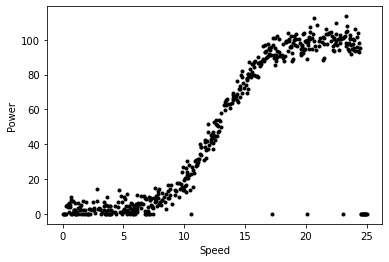

In [3]:
# Plotting data set.
plt.plot(X, y, 'k.')
plt.xlabel("Speed")
plt.ylabel("Power")

<br>
After plotting the data set we can determine that the function used to get power from the speed is sigmoid. The reasoning behind this is due to the shape of the graph.  The difference in this situation is that the values are all positive instead of beginning both negative and positive.
<br>

***

##### Sigmoid Graph Example


<img style="float: left;" src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="500" height="500">

In [4]:
# Printing outliers
outliers = df[X > 10][y == 0.000]
print(outliers)

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


<ipython-input-4-6d17a4e2b3fb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[X > 10][y == 0.000]


In [5]:
df = df.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499])

In [6]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X = X.reshape(-1,1)

Text(0, 0.5, 'Power')

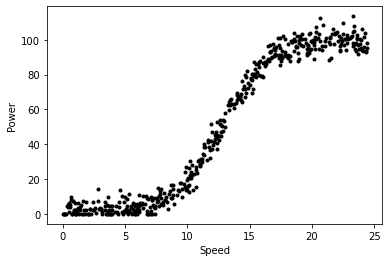

In [7]:
# Plotting data set.
plt.plot(X, y, 'k.')
plt.xlabel("Speed")
plt.ylabel("Power")

In [8]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


<br>
https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb
<br>

In [9]:
import sklearn.linear_model as sklm
model = sklm.LinearRegression()

model.fit(X, y)
accurancy = model.score(X, y)

print("The accurancy or 'regression' of this model is: ", accurancy)

The accurancy or 'regression' of this model is:  0.9025487607456801


In [10]:
# Getting the test data set.
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=0)

<br>
https://keras.io/api/models/model/
<br>

In [11]:
# Create a model for neural network.
# model = kr.models.Sequential() - change to model above

inputLayer = kr.Input(shape=(1,))
hiddenLayer1 = kr.layers.Dense(50, activation="sigmoid")(inputLayer)
hiddenLayer2 = kr.layers.Dense(50, activation="sigmoid")(hiddenLayer1)
hiddenLayer3 = kr.layers.Dense(30, activation="sigmoid")(hiddenLayer2)
outputs = kr.layers.Dense(1,)(hiddenLayer3)
model = kr.Model(inputLayer, outputs=outputs)

#model.add(kr.layers.Dense(3, activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [12]:
# Train the neural network on our df data
model.fit(X, y, epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 4089.8398
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 3987.6870
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 3896.2205
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 3820.6067
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 3760.8623
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 3713.8140
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 3674.1013
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 3636.7161
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 3602.8494
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 3572.1213
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 3542.0178
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 3514.1836
E

Epoch 98/500
16/16 [==============================] - 0s 1ms/step - loss: 2097.7522
Epoch 99/500
16/16 [==============================] - 0s 1ms/step - loss: 2088.3154
Epoch 100/500
16/16 [==============================] - 0s 1ms/step - loss: 2079.2397
Epoch 101/500
16/16 [==============================] - 0s 1ms/step - loss: 2070.8464
Epoch 102/500
16/16 [==============================] - 0s 1ms/step - loss: 2062.4680
Epoch 103/500
16/16 [==============================] - 0s 1ms/step - loss: 2054.2209
Epoch 104/500
16/16 [==============================] - 0s 1ms/step - loss: 2045.9381
Epoch 105/500
16/16 [==============================] - 0s 1ms/step - loss: 2038.2806
Epoch 106/500
16/16 [==============================] - 0s 1ms/step - loss: 2029.9816
Epoch 107/500
16/16 [==============================] - 0s 2ms/step - loss: 2020.3916
Epoch 108/500
16/16 [==============================] - 0s 1ms/step - loss: 2010.4014
Epoch 109/500
16/16 [==============================] - 0s 1ms/step 

16/16 [==============================] - 0s 1ms/step - loss: 1018.8104
Epoch 195/500
16/16 [==============================] - 0s 1ms/step - loss: 996.3702
Epoch 196/500
16/16 [==============================] - 0s 1ms/step - loss: 977.7212
Epoch 197/500
16/16 [==============================] - 0s 1ms/step - loss: 958.9557
Epoch 198/500
16/16 [==============================] - 0s 1ms/step - loss: 941.8144
Epoch 199/500
16/16 [==============================] - 0s 1ms/step - loss: 925.2639
Epoch 200/500
16/16 [==============================] - 0s 1ms/step - loss: 909.3626
Epoch 201/500
16/16 [==============================] - 0s 1ms/step - loss: 893.5642
Epoch 202/500
16/16 [==============================] - 0s 1ms/step - loss: 879.9907
Epoch 203/500
16/16 [==============================] - 0s 1ms/step - loss: 865.1407
Epoch 204/500
16/16 [==============================] - 0s 1ms/step - loss: 850.4962
Epoch 205/500
16/16 [==============================] - 0s 1ms/step - loss: 836.4107
Epoch

16/16 [==============================] - 0s 1ms/step - loss: 193.2786
Epoch 292/500
16/16 [==============================] - 0s 1ms/step - loss: 189.7130
Epoch 293/500
16/16 [==============================] - 0s 1ms/step - loss: 186.3754
Epoch 294/500
16/16 [==============================] - 0s 1ms/step - loss: 183.2347
Epoch 295/500
16/16 [==============================] - 0s 1ms/step - loss: 179.9779
Epoch 296/500
16/16 [==============================] - 0s 1ms/step - loss: 177.0068
Epoch 297/500
16/16 [==============================] - 0s 2ms/step - loss: 174.1294
Epoch 298/500
16/16 [==============================] - ETA: 0s - loss: 168.719 - 0s 3ms/step - loss: 171.5622
Epoch 299/500
16/16 [==============================] - 0s 3ms/step - loss: 168.1558
Epoch 300/500
16/16 [==============================] - 0s 2ms/step - loss: 165.1528
Epoch 301/500
16/16 [==============================] - 0s 1ms/step - loss: 162.2955
Epoch 302/500
16/16 [==============================] - 0s 1ms/st

16/16 [==============================] - 0s 2ms/step - loss: 34.8152
Epoch 390/500
16/16 [==============================] - 0s 2ms/step - loss: 34.3396
Epoch 391/500
16/16 [==============================] - 0s 2ms/step - loss: 33.8564
Epoch 392/500
16/16 [==============================] - 0s 1ms/step - loss: 33.4871
Epoch 393/500
16/16 [==============================] - 0s 1ms/step - loss: 32.8598
Epoch 394/500
16/16 [==============================] - 0s 1ms/step - loss: 32.3695
Epoch 395/500
16/16 [==============================] - 0s 1ms/step - loss: 32.2415
Epoch 396/500
16/16 [==============================] - 0s 1ms/step - loss: 32.2367
Epoch 397/500
16/16 [==============================] - 0s 1ms/step - loss: 31.4975
Epoch 398/500
16/16 [==============================] - 0s 1ms/step - loss: 30.5689
Epoch 399/500
16/16 [==============================] - 0s 1ms/step - loss: 30.8058
Epoch 400/500
16/16 [==============================] - 0s 1ms/step - loss: 30.0149
Epoch 401/500
16/1

16/16 [==============================] - 0s 1ms/step - loss: 17.4995
Epoch 488/500
16/16 [==============================] - 0s 2ms/step - loss: 17.1996
Epoch 489/500
16/16 [==============================] - 0s 1ms/step - loss: 17.2592
Epoch 490/500
16/16 [==============================] - 0s 1ms/step - loss: 17.8288
Epoch 491/500
16/16 [==============================] - 0s 2ms/step - loss: 17.3274
Epoch 492/500
16/16 [==============================] - 0s 1ms/step - loss: 17.1472
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 17.6282
Epoch 494/500
16/16 [==============================] - 0s 1ms/step - loss: 17.9981
Epoch 495/500
16/16 [==============================] - 0s 1ms/step - loss: 17.1870
Epoch 496/500
16/16 [==============================] - 0s 1ms/step - loss: 17.4149
Epoch 497/500
16/16 [==============================] - 0s 1ms/step - loss: 17.1006
Epoch 498/500
16/16 [==============================] - 0s 1ms/step - loss: 17.1267
Epoch 499/500
16/1

In [13]:
# Take five hand-picked values and see their predictions.
model.predict([1.0,3.0,10.0,50.0,75.0])

array([[ 2.6153154],
       [ 2.8899417],
       [18.594036 ],
       [97.7863   ],
       [97.786354 ]], dtype=float32)

In [14]:
# Train the neural network on our test data set
model.fit(X_test, y_test, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 17.9790
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 16.9515
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 19.1968
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 17.4088
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 17.7956
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 17.6987
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 16.2329
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 17.0141
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 16.4779
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 16.7829
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 16.6178
Epoch 12/500
4/4 [==============================] - 0s 1ms/step - loss: 17.3145
Epoch 13/500
4/4 [==============================]

4/4 [==============================] - 0s 2ms/step - loss: 15.5072
Epoch 104/500
4/4 [==============================] - 0s 2ms/step - loss: 15.7091
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 15.4135
Epoch 106/500
4/4 [==============================] - 0s 3ms/step - loss: 15.3824
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 15.3458
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 15.5573
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 15.2636
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 15.3118
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 15.3854
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 15.6285
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 17.0468
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 16.0694
Epoch 115/500
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 15.3590
Epoch 205/500
4/4 [==============================] - 0s 2ms/step - loss: 16.1640
Epoch 206/500
4/4 [==============================] - 0s 2ms/step - loss: 15.1548
Epoch 207/500
4/4 [==============================] - 0s 1ms/step - loss: 14.8769
Epoch 208/500
4/4 [==============================] - 0s 1ms/step - loss: 15.6399
Epoch 209/500
4/4 [==============================] - 0s 1ms/step - loss: 15.4954
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 14.9832
Epoch 211/500
4/4 [==============================] - 0s 1ms/step - loss: 15.0005
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 16.2441
Epoch 213/500
4/4 [==============================] - 0s 1ms/step - loss: 17.4158
Epoch 214/500
4/4 [==============================] - 0s 1ms/step - loss: 16.0521
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 23.3051
Epoch 216/500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 15.0305
Epoch 306/500
4/4 [==============================] - 0s 2ms/step - loss: 15.0012
Epoch 307/500
4/4 [==============================] - 0s 2ms/step - loss: 15.1543
Epoch 308/500
4/4 [==============================] - 0s 1ms/step - loss: 16.7517
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 15.9297
Epoch 310/500
4/4 [==============================] - 0s 3ms/step - loss: 15.0770
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 16.4775
Epoch 312/500
4/4 [==============================] - 0s 2ms/step - loss: 15.5500
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 15.2492
Epoch 314/500
4/4 [==============================] - 0s 1ms/step - loss: 14.9200
Epoch 315/500
4/4 [==============================] - 0s 1ms/step - loss: 15.0309
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 14.8754
Epoch 317/500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 15.9421
Epoch 407/500
4/4 [==============================] - 0s 1ms/step - loss: 18.8248
Epoch 408/500
4/4 [==============================] - 0s 1ms/step - loss: 15.2370
Epoch 409/500
4/4 [==============================] - 0s 2ms/step - loss: 17.3681
Epoch 410/500
4/4 [==============================] - 0s 2ms/step - loss: 17.6704
Epoch 411/500
4/4 [==============================] - 0s 1ms/step - loss: 15.3434
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 18.9188
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 19.5402
Epoch 414/500
4/4 [==============================] - 0s 1ms/step - loss: 15.6172
Epoch 415/500
4/4 [==============================] - 0s 1ms/step - loss: 15.2453
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 16.5744
Epoch 417/500
4/4 [==============================] - 0s 1ms/step - loss: 15.7906
Epoch 418/500
4/4 [=======================

Text(0, 0.5, 'Power')

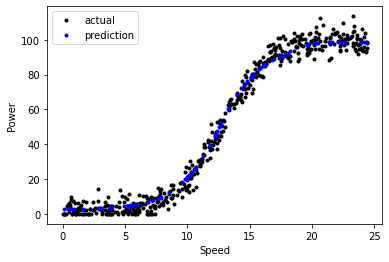

In [15]:
# Let's plot our predictions of the x values we trained on
plt.plot(X, y, 'k.', label='actual')
plt.plot(X_test, model.predict(X_test), 'b.', label='prediction')
plt.legend();
plt.xlabel("Speed")
plt.ylabel("Power")

<br>
https://keras.io/examples/vision/mnist_convnet/

***

# End